In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_df = spark.read.format("csv").option("header", "true").option("inferSchema","True").load("dbfs:/FileStore/shared_uploads/skappala@gmu.edu/Train.csv")
test_df = spark.read.format("csv").option("header", "true").option("inferSchema","True").load("dbfs:/FileStore/shared_uploads/skappala@gmu.edu/Test.csv")

In [0]:
# Length of Train and Test Data
print((train_df.count(), len(train_df.columns)))
print((test_df.count(), len(test_df.columns)))

(7352, 562)
(2947, 562)


In [0]:
# Feature Preprocessing

from pyspark.ml.feature import StringIndexer

labelToIndex = StringIndexer(inputCol="Activity", outputCol="label")

In [0]:
from pyspark.ml.feature import VectorAssembler

numerical_columns = train_df.columns[:-1]
vecAssembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")

#### Logistic Regression

In [0]:
# Define the Model
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="label", regParam=1.0)

In [0]:
# Build the pipeline

from pyspark.ml import Pipeline
 
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[labelToIndex, vecAssembler, lr])
 
# Define the pipeline model.
pipelineModel = pipeline.fit(train_df)
 
# Apply the pipeline model to the test dataset.
predDF = pipelineModel.transform(test_df)


In [0]:
display(predDF.select("features", "label", "prediction", "probability"))

features label prediction probability Map(vectorType -> dense, length -> 561, values -> List(0.25717778, -0.02328523, -0.014653762, -0.938404, -0.92009078, -0.66768331, -0.95250112, -0.92524867, -0.67430222, -0.89408755, -0.55457721, -0.46622295, 0.71720847, 0.6355024, 0.78949666, -0.87776423, -0.99776606, -0.99841381, -0.93434525, -0.97566897, -0.94982365, -0.8304778, -0.16808416, -0.37899553, 0.24621698, 0.52120364, -0.48779311, 0.48228047, -0.045462113, 0.21195505, -0.13489443, 0.13085848, -0.014176313, -0.10597085, 0.073544013, -0.17151642, 0.040062978, 0.076988933, -0.49054573, -0.70900265, 0.93648925, -0.28271916, 0.11528825, -0.92542727, -0.93701413, -0.56428842, -0.93001992, -0.93782195, -0.6055877, 0.90608259, -0.27924413, 0.15289519, 0.9444614, -0.26215956, -0.076161676, -0.01782692, 0.82929682, -0.8646206, -0.96779531, -0.94972666, -0.9461192, -0.75971815, -0.42497535, -1.0, 0.21922731, -0.43025357, 0.43104828, -0.43183892, 0.4327738, -0.79546772, 0.78131389, -0.78039147, 0.78527158, -0.98441024, 0.98717986, -0.98941477, 0.98768613, 0.98058028, -0.99635177, -0.96011706, 0.072046007, 0.045754401, -0.10604266, -0.90668276, -0.93801639, -0.93593583, -0.91608093, -0.93672546, -0.94905379, -0.90322415, -0.94981833, -0.89140347, 0.89847935, 0.95018164, 0.94615279, -0.93067288, -0.99504593, -0.99749551, -0.9970156, -0.936416, -0.94687413, -0.96877461, -0.085174151, -0.31026304, -0.51028758, 0.52148173, -0.22588966, 0.49172843, 0.31275555, 0.2297968, 0.11395925, 0.21987861, 0.42297454, -0.082633177, 0.14042653, -0.19623228, 0.072357939, -0.26486023, 0.03585215, -0.34973525, 0.11997616, -0.091792335, 0.18962854, -0.88308911, -0.8161636, -0.94088123, -0.88861231, -0.85780102, -0.94581827, -0.66341057, -0.71343663, -0.64867861, 0.83710039, 0.82525677, 0.81097714, -0.79649994, -0.97961636, -0.98290006, -0.99403684, -0.88655788, -0.90610426, -0.95804876, 0.77403279, -0.26770588, 0.45224806, -0.078451267, -0.012578616, 0.23598156, -0.19904751, 0.03391784, -0.080780533, 0.006998715, 0.24488551, 0.21651661, -0.27968077, 0.24973875, 0.017719752, 0.64846454, -0.23693109, -0.30173469, -0.20489621, -0.17448771, -0.09338934, -0.90122415, -0.91086005, -0.93925042, -0.91036271, -0.92735675, -0.95355413, -0.86791431, -0.91349778, -0.89757791, 0.90493669, 0.91730839, 0.9476122, -0.92960905, -0.99468622, -0.99579057, -0.99781265, -0.93654081, -0.95887957, -0.97034831, 0.03661912, 0.076459933, -0.19712605, 0.10651426, -0.020811895, 0.19325784, 0.30447875, 0.11572923, 0.0541496, 0.068951237, 0.1970496, 0.30992826, -0.21265711, 0.17317814, 0.14584454, 0.12400875, -0.15534634, -0.32343727, -0.86692938, -0.70519112, -0.74402172, -0.76079564, -0.9816487, -0.86692938, -0.98016578, -0.85947423, 0.25510436, 0.053779695, -0.20414449, 0.61052755, -0.56444932, -0.86692938, -0.70519112, -0.74402172, -0.76079564, -0.9816487, -0.86692938, -0.98016578, -0.85947423, 0.25510436, 0.053779695, -0.20414449, 0.61052755, -0.56444932, -0.92976655, -0.89599425, -0.90041731, -0.90300439, -0.97501109, -0.92976655, -0.99560772, -0.91412066, -0.12955231, 0.23891093, -0.34559715, 0.32646236, -0.263048, -0.79554393, -0.76207322, -0.78267232, -0.71659365, -0.76419261, -0.79554393, -0.97415212, -0.83958101, 0.66756269, 0.035621137, -0.16189398, 0.15325006, -0.006759604, -0.92519489, -0.89434361, -0.90014668, -0.91673708, -0.97636665, -0.92519489, -0.99582422, -0.9118375, 0.33165431, 0.51695316, -0.513504, 0.041319806, 0.011835012, -0.91850969, -0.91821319, -0.78909145, -0.94829035, -0.92513687, -0.63631674, -0.93068029, -0.92443848, -0.72490255, -0.96842407, -0.94013675, -0.59718873, -0.96613713, -0.98445054, -0.95208707, -0.86506318, -0.99784371, -0.99603625, -0.94019503, -0.90484043, -0.93381245, -0.86938291, -0.33967327, -0.48580324, -0.16625765, -1.0, -1.0, -1.0, 0.011116947, 0.12125069, -0.52294869, -0.5719995, -0.89461236, -0.33826592, -0.68679745, 0.1895525, -0.11359571, -0.99850627, -0.99794262, -0.99559788, -0.99503559, -0.9959769, -0.99148743, -0.99213116, -0.9997

In [0]:
# Evaluate the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(predDF)}")

Accuracy: 0.9131319986426875


In [0]:
predictionAndLabels = list(predDF.select("label", "prediction"))
type(predictionAndLabels)

Out[10]: list

In [0]:
def create_confusion_matrix(predDF):
    acts = predDF.select("label").rdd.flatMap(lambda x: x).collect()
    preds = predDF.select("prediction").rdd.flatMap(lambda x: x).collect()
    
    acts_and_preds = []
    for i in range(len(acts)):
        acts_and_preds.append((acts[i], preds[i]))
    
    acts_and_preds = sc.parallelize(acts_and_preds)
    metrics = MulticlassMetrics(acts_and_preds)
    matrix = metrics.confusionMatrix().toArray()
    
    labels = ["Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying"]
    plt.figure(figsize=(15,5))
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()
    
    

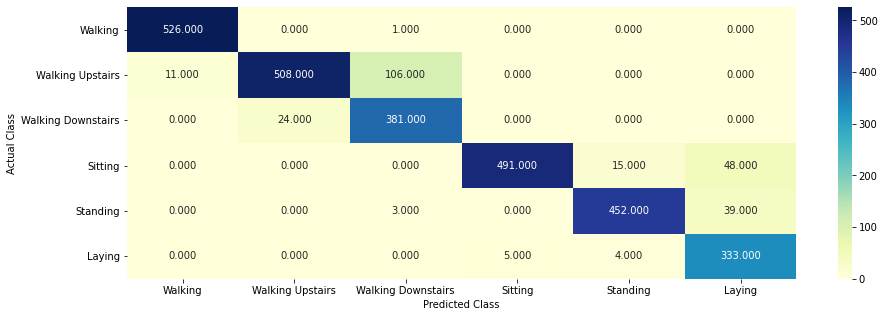

In [0]:
create_confusion_matrix(predDF)

In [0]:
#2.8 Hyperparameter tuning
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
 
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build())

In [0]:
# Create a 3-fold CrossValidator
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=mcEvaluator, numFolds=3, parallelism = 4)
 
# Run cross validations. This step takes a few minutes and returns the best model found from the cross validation.
cvModel = cv.fit(train_df)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.


In [0]:
cvPredDF = cvModel.transform(test_df)
print(f"Accuracy: {mcEvaluator.evaluate(cvPredDF)}")

Accuracy: 0.9412962334577536


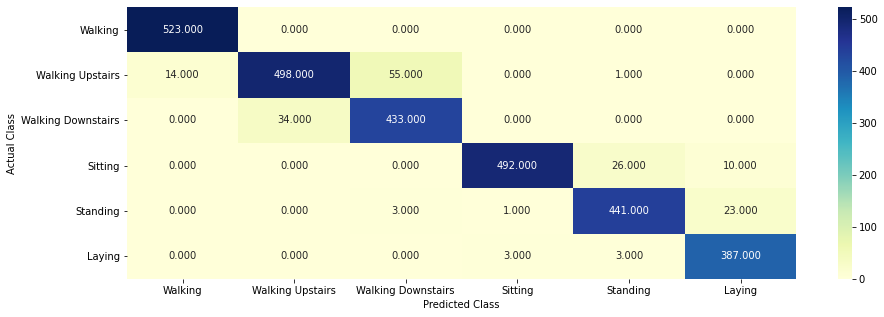

In [0]:
create_confusion_matrix(cvPredDF)

#### Decision Tree

In [0]:
# Define the Model
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")

In [0]:
# Build the pipeline

from pyspark.ml import Pipeline
 
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[labelToIndex, vecAssembler, dt])
 
# Define the pipeline model.
pipelineModel = pipeline.fit(train_df)
 
# Apply the pipeline model to the test dataset.
dt_predDF = pipelineModel.transform(test_df)


In [0]:
mcEvaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {mcEvaluator.evaluate(dt_predDF)}")

Accuracy: 0.835425856803529


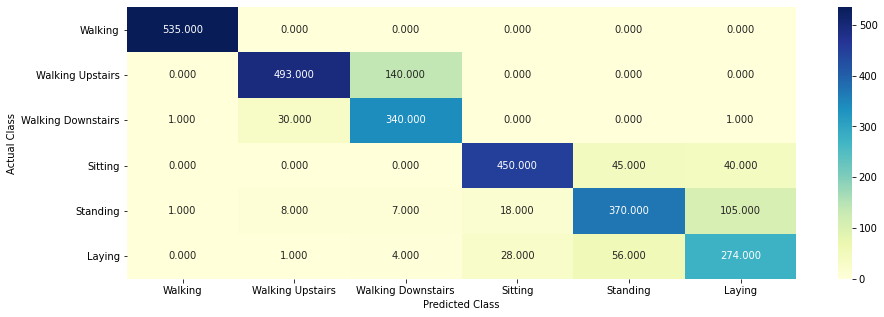

In [0]:
create_confusion_matrix(dt_predDF)

#### Random Forest

In [0]:
# Define the Model
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="label")

In [0]:
# Define the pipeline based on the stages created in previous steps.
pipeline = Pipeline(stages=[labelToIndex, vecAssembler, rf])
 
# Define the pipeline model.
pipelineModel = pipeline.fit(train_df)
 
# Apply the pipeline model to the test dataset.
predDF = pipelineModel.transform(test_df)

In [0]:
evaluator_rf = MulticlassClassificationEvaluator(metricName="accuracy")
print(f"Accuracy: {evaluator_rf.evaluate(predDF)}")

Accuracy: 0.8673227010519172


In [0]:
evaluator_rf = MulticlassClassificationEvaluator(metricName="accuracy")

#ParamGrid 
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [5, 10, 15, 25])
             .addGrid(rf.numTrees, [10, 20, 50])
             .build())

cv_rf = CrossValidator(estimator = pipeline,
                      estimatorParamMaps = rf_paramGrid,
                      evaluator = evaluator_rf,
                      numFolds = 3,
                      parallelism = 4)

In [0]:
cv_rfModel = cv_rf.fit(train_df)
cv_rfPredDF = cv_rfModel.transform(test_df)
print(f"Accuracy: {evaluator_rf.evaluate(cv_rfPredDF)}")

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
Accuracy: 0.9222938581608415


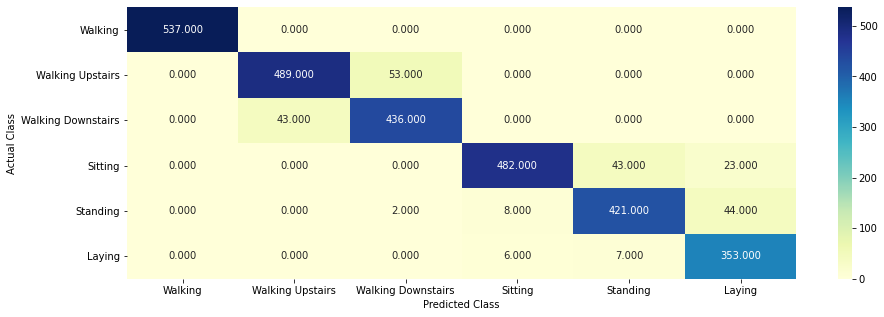

In [0]:
create_confusion_matrix(cv_rfPredDF)

In [0]:
importances = pipelineModel.stages[-1].featureImportances
top_10_values = sorted([(float(importance), feature) for (importance, feature) in zip(importances, numerical_columns)], reverse=True)[:10]

In [0]:
display(top_10_values)

_1 _2 0.05729672328948843 tGravityAccmeanX 0.05327779294513167 angleYgravityMean 0.04121277455252705 tGravityAccminX 0.04061896774726341 angleXgravityMean 0.033632913997365954 tGravityAccmaxY 0.03313458159015708 tBodyAccenergyX 0.03276196657932996 tGravityAccenergyX 0.02734758162539336 tBodyAccJerkMagentropy 0.019829308846812863 fBodyAccJerkbandsEnergy18 0.019738299139766814 fBodyAccmadX

Databricks visualization. Run in Databricks to view.